In [ ]:
#Question 1

In [13]:
import pandas as pd
import numpy as np 

independent_data = pd.read_csv('linearX.csv')
dependent_data = pd.read_csv('linearX.csv')
                             
X = independent_data.iloc[:, 0].values.reshape(-1, 1)
y = dependent_data.iloc[:, 0].values.reshape(-1, 1)

learning_rate = 0.01

num_iterations = 1000

m = 0
b = 0
def cost_function(X, y, m, b):
  
  predictions = m * X + b
  errors = predictions - y
  return (1 / (2 * len(y))) * np.sum(errors**2)

for i in range(num_iterations):
  
  predictions = m * X + b
  
  errors = predictions - y

  m_derivative = -(1 / len(y)) * np.sum(X * errors)
  b_derivative = -(1 / len(y)) * np.sum(errors)

  m -= learning_rate * m_derivative
  b -= learning_rate * b_derivative

print(f"Final coefficients: m = {m}, b = {b}")

new_data = [[10]]  
predicted_value = m * int(new_data[0][0]) + b 
print(f"Predicted value for new data point: {predicted_value}")

Final coefficients: m = -1.9646308966134433e+227, b = -2.3340537052689766e+226
Predicted value for new data point: -1.987971433666133e+228


In [ ]:
#Question 3

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\3293642498.py:17: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
C:\Users\KIIT\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\3293642498.py:27: RuntimeWarning: invalid value encountered in scalar subtract
  if i > 0 and abs(cost_history[i] - cost_history[i-1]) < 1e-6:
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\3293642498.py:24: RuntimeWarning: invalid value encountered in subtract
  theta = theta - (alpha / m) * X.T.dot(predictions - y)


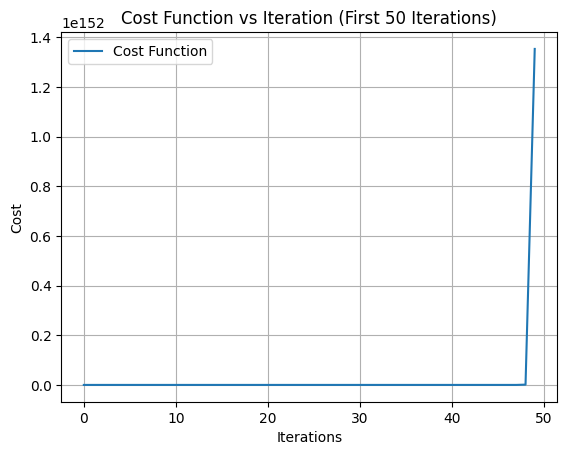

Converged theta: [nan nan]
Final cost: nan


In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('linearX.csv')  
y = np.loadtxt('linearY.csv')  

X = np.c_[np.ones(X.shape[0]), X]

theta = np.zeros(X.shape[1])

alpha = 0.5  
iterations = 1000
m = len(y)  

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (alpha / m) * X.T.dot(predictions - y)
        cost_history[i] = compute_cost(X, y, theta)
        
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < 1e-6:
            break
            
    return theta, cost_history

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(50), cost_history[:50], label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iteration (First 50 Iterations)")
plt.legend()
plt.grid(True)
plt.show()

print(f"Converged theta: {theta}")
print(f"Final cost: {cost_history[-1]}")

In [ ]:
#Question 4

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\4197690097.py:22: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\4197690097.py:33: RuntimeWarning: invalid value encountered in scalar subtract
  if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\4197690097.py:21: RuntimeWarning: overflow encountered in matmul
  predictions = X @ theta
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\4197690097.py:28: RuntimeWarning: overflow encountered in matmul
  gradients = (1 / m) * X_b.T @ (X_b @ theta - y)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\4197690097.py:29: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


Final cost: nan
Final parameters (theta): 
[[nan]
 [nan]]


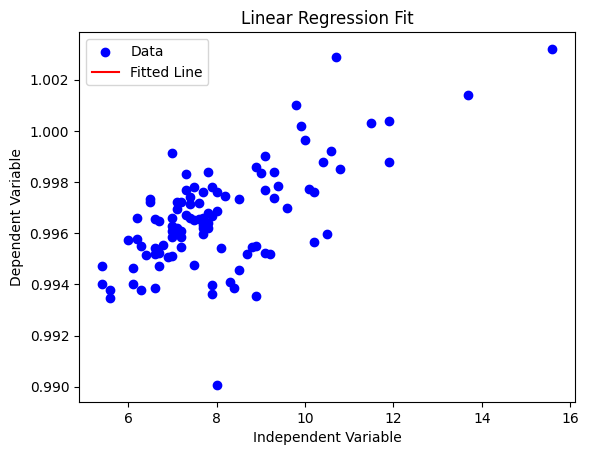

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

X = pd.read_csv('linearX.csv', header=None).values
y = pd.read_csv('linearY.csv', header=None).values

y = y.reshape(-1, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

learning_rate = 0.5
n_iterations = 1000
tolerance = 1e-6

theta = np.random.randn(2, 1)

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

m = len(y)
cost_history = []
for iteration in range(n_iterations):
    gradients = (1 / m) * X_b.T @ (X_b @ theta - y)
    theta -= learning_rate * gradients
    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)
    
    if iteration > 0 and abs(cost_history[-2] - cost_history[-1]) < tolerance:
        print(f"Converged after {iteration} iterations.")
        break

print(f"Final cost: {cost}")
print(f"Final parameters (theta): \n{theta}")

plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, X_b @ theta, color="red", label="Fitted Line")
plt.legend()
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression Fit")
plt.show()


In [ ]:
#Question 5

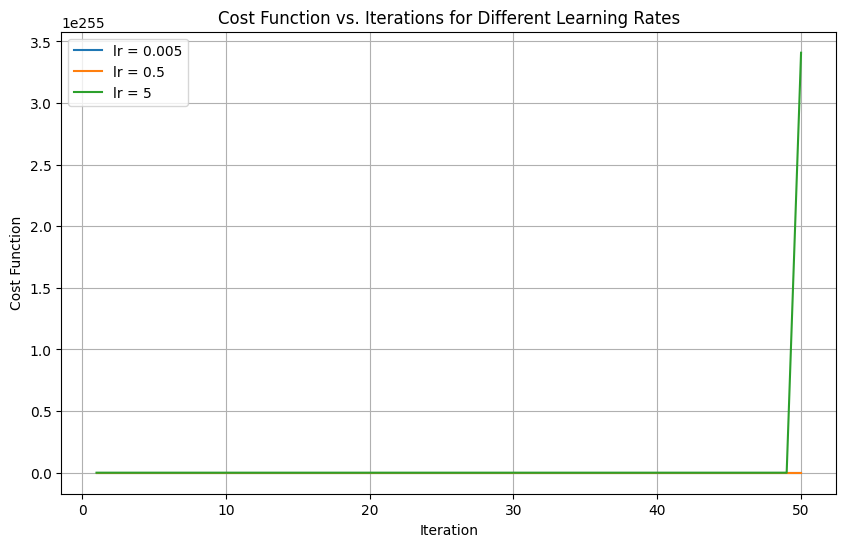


Observations:
1. For lr = 0.005: The cost decreases slowly, indicating very slow convergence.
2. For lr = 0.5: The cost decreases steadily and converges within a reasonable number of iterations.
3. For lr = 5: The cost fluctuates wildly, indicating divergence due to a learning rate that's too high.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

X = pd.read_csv('linearX.csv', header=None).values
y = pd.read_csv('linearY.csv', header=None).values

y = y.reshape(-1, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(2, 1)  
    cost_history = []

    for iteration in range(n_iterations):
        gradients = (1 / m) * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

learning_rates = [0.005, 0.5, 5]
n_iterations = 50

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    _, cost_history = gradient_descent(X_b, y, learning_rate=lr, n_iterations=n_iterations)
    plt.plot(range(1, n_iterations + 1), cost_history, label=f"lr = {lr}")

plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations for Different Learning Rates")
plt.legend()
plt.grid()
plt.show()

print("\nObservations:")
print("1. For lr = 0.005: The cost decreases slowly, indicating very slow convergence.")
print("2. For lr = 0.5: The cost decreases steadily and converges within a reasonable number of iterations.")
print("3. For lr = 5: The cost fluctuates wildly, indicating divergence due to a learning rate that's too high.")


In [ ]:
#Question 6

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\2280212869.py:19: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\2280212869.py:47: RuntimeWarning: overflow encountered in matmul
  gradients = xi.T @ (xi @ theta - yi)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_19320\2280212869.py:48: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients
C:\Users\KIIT\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


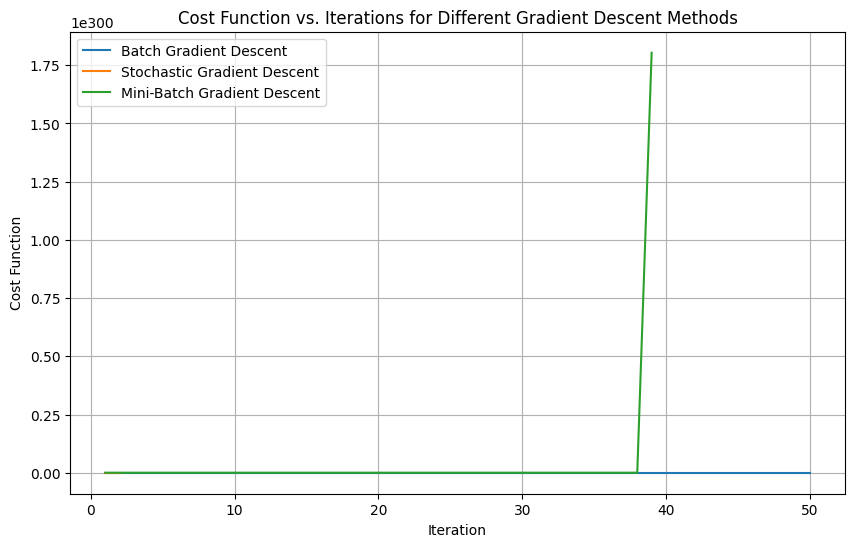


Observations:
1. Batch Gradient Descent: Converges smoothly, but can be slow due to computation over the entire dataset in each iteration.
2. Stochastic Gradient Descent: Converges faster initially but shows fluctuations due to single-instance updates.
3. Mini-Batch Gradient Descent: Balances convergence speed and stability by using smaller batches, making it more efficient and less noisy than stochastic gradient descent.


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests


X = pd.read_csv('linearX.csv', header=None).values
y = pd.read_csv('linearY.csv', header=None).values

y = y.reshape(-1, 1)

# Add a bias term (intercept) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Batch gradient descent
def batch_gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(2, 1)  # Initialize parameters
    cost_history = []

    for iteration in range(n_iterations):
        gradients = (1 / m) * X.T @ (X @ theta - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate, n_iterations):
    m = len(y)
    theta = np.random.randn(2, 1)  # Initialize parameters
    cost_history = []

    for iteration in range(n_iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Mini-batch gradient descent
def mini_batch_gradient_descent(X, y, learning_rate, n_iterations, batch_size):
    m = len(y)
    theta = np.random.randn(2, 1)  # Initialize parameters
    cost_history = []

    for iteration in range(n_iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = (1 / batch_size) * xi.T @ (xi @ theta - yi)
            theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Set parameters
learning_rate = 0.1
n_iterations = 50
batch_size = 20

# Run gradient descent methods
_, cost_history_batch = batch_gradient_descent(X_b, y, learning_rate, n_iterations)
_, cost_history_stochastic = stochastic_gradient_descent(X_b, y, learning_rate, n_iterations)
_, cost_history_minibatch = mini_batch_gradient_descent(X_b, y, learning_rate, n_iterations, batch_size)

# Plot the cost function for each method
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), cost_history_batch, label="Batch Gradient Descent")
plt.plot(range(1, n_iterations + 1), cost_history_stochastic, label="Stochastic Gradient Descent")
plt.plot(range(1, n_iterations + 1), cost_history_minibatch, label="Mini-Batch Gradient Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost Function")
plt.title("Cost Function vs. Iterations for Different Gradient Descent Methods")
plt.legend()
plt.grid()
plt.show()

# Observations
print("\nObservations:")
print("1. Batch Gradient Descent: Converges smoothly, but can be slow due to computation over the entire dataset in each iteration.")
print("2. Stochastic Gradient Descent: Converges faster initially but shows fluctuations due to single-instance updates.")
print("3. Mini-Batch Gradient Descent: Balances convergence speed and stability by using smaller batches, making it more efficient and less noisy than stochastic gradient descent.")
